In [2]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt

In [3]:
def show_rgb(img):
    img_2 = img[:,:,::-1]
    plt.imshow(img_2)
    plt.show()

In [4]:
def show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

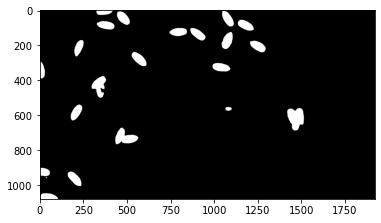

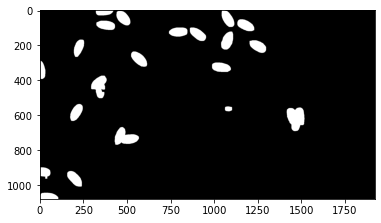

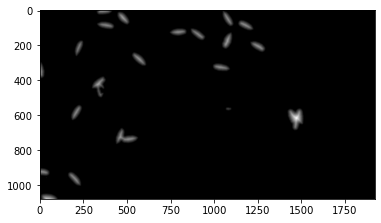

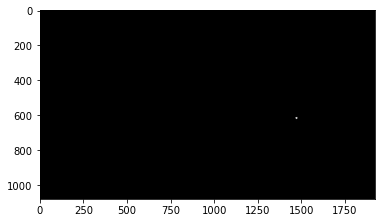

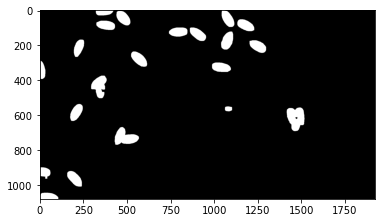

In [41]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_th,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.9*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
show(opening)
show(sure_bg)
show(dist_transform)
show(sure_fg)
show(unknown)

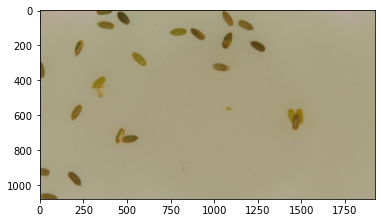

150.0


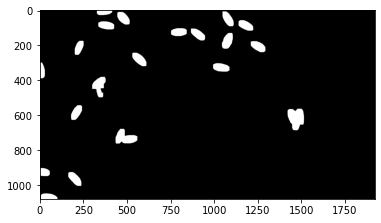

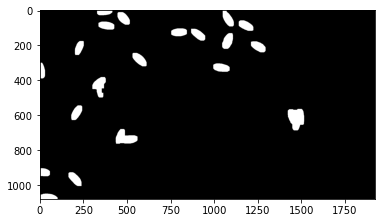

In [32]:
# cam = cv2.VideoCapture(1, cv2.CAP_DSHOW)
# cam.set(3,1920)
# cam.set(4,1080)
# ret, img = cam.read()
img = cv2.imread("./img/1.jpg")
show_rgb(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_b, img_g, img_r= cv2.split(img)
# cv2.imwrite('./img/img_b.jpg', img_b)
# cv2.imwrite('./img/img_g.jpg', img_g)
# cv2.imwrite('./img/img_r.jpg', img_r)
# reverse
img_rev = 255 - img_b
cv2.imwrite('./img/img_rev.jpg', img_rev)
# gaussian blur
img_blur = cv2.GaussianBlur(img_rev,(5,5),0)
# ret,img_th = cv2.threshold(img_blur,155,255,cv2.THRESH_BINARY)
ret, img_th = cv2.threshold(img_blur,150,255,cv2.THRESH_BINARY)
print(ret)
# show(img_th)
# cv2.imwrite('./img/img_th.jpg', img_th)

# opening
kernel = np.ones((20,20),np.uint8)
img_open = cv2.morphologyEx(img_th, cv2.MORPH_OPEN, kernel)
show(img_open)
# cv2.imwrite('./img/img_open.jpg', img_open)


# closing
img_close = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, kernel)
show(img_close)
# cv2.imwrite('./img/img_close.jpg', img_close)



# # fill holes
# # Mask used to flood filling.
# # Notice the size needs to be 2 pixels than the image.
# h, w = img.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# img_floodfill = img_close.copy()
# cv2.floodFill(img_floodfill, mask, (0,0), 255);
# img_floodfill_inv = cv2.bitwise_not(img_floodfill)
# img_floodfill = img_open | img_floodfill_inv
# show(img_floodfill)



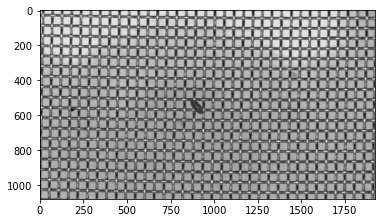

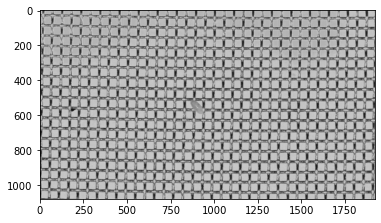

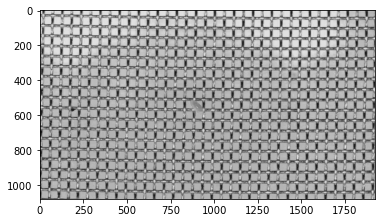

In [5]:
show(img_b)
show(img_g)
show(img_r)

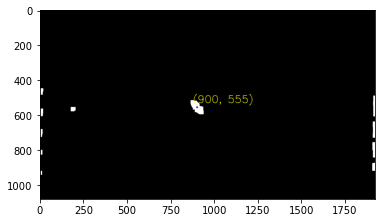

True

In [6]:
# find center
img_center = img_close.copy()
# find contours in the binary image
contours, hierarchy = cv2.findContours(img_center, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_center = cv2.cvtColor(img_center, cv2.COLOR_GRAY2BGR)
for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    if cv2.contourArea(c)>2500:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_center, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(img_center, f'({cX}, {cY})', (cX - 25, cY - 25), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 2)
show_rgb(img_center)
cv2.imwrite('center.jpg', img_center)

242.0
661.5
349.0
1092.5
576.5
1065.0
706.0
621.5
3712.5
1088.0
597.5


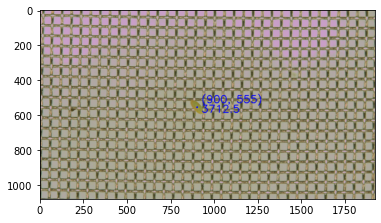

True

In [7]:
img_center = img.copy()
for c in contours:
    # calculate moments for each contour
    print(cv2.contourArea(c))
    M = cv2.moments(c)
    if cv2.contourArea(c)>2500:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(img_center, f'{cv2.contourArea(c)}', (cX + 25 , cY + 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
        cv2.circle(img_center, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(img_center, f'({cX}, {cY})', (cX + 25, cY - 25), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
show_rgb(img_center)
cv2.imwrite('center_filltered.jpg', img_center)

In [7]:
image = ImageProcessing()
center3 = image.find_center()

In [11]:
center3[0][0]

971

In [7]:
import cv2


cam = cv2.VideoCapture(1)
# cam.set(3,1920)
# cam.set(4,1080)
print(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
cv2.namedWindow("test")

img_counter = 0

ret, img = cam.read()
if not ret:
    print("failed to grab frame")
show_rgb(frame)
cv2.imwrite("test.jpg", frame)

# k = cv2.waitKey(1)
# if k%256 == 27:
#     # ESC pressed
#     print("Escape hit, closing...")
#     break
# elif k%256 == 32:
#     # SPACE pressed
#     img_name = "opencv_frame_{}.png".format(img_counter)
#     cv2.imwrite(img_name, frame)
#     print("{} written!".format(img_name))
#     img_counter += 1

cam.release()

cv2.destroyAllWindows()

640.0
480.0


TypeError: 'NoneType' object is not subscriptable

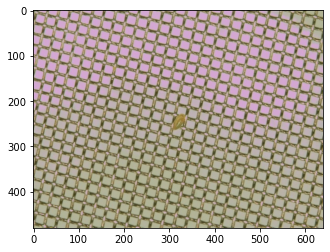

In [9]:
show_rgb(img)

In [4]:
from mt24x import MT24X
motor = MT24X('COM3', 115200)

SerialException: could not open port 'COM3': PermissionError(13, '存取被拒。', None, 5)

In [2]:
from image import ImageProcessing
cam = ImageProcessing()

load camera finished


GET_P 0 <- 40200
GET_P 1 <- 39800
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 40240 39760 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
save images at: calibration/calibration_0.jpg
[(970, 385)]
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 -17 276 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 40220 39764 <- OK
GET_RUN 0 <- 1
GET_RUN 0 <- 0
GET_RUN 1 <- 0
GET_RUN 2 <- 0
save images at: calibration/calibration_1.jpg
[(958, 344)]
L_ACC_DEC_V 0 3000 3000 1000 <- OK
L_ABS 0 0 1 3 349 <- OK
GET_RUN 0 <- 1


KeyboardInterrupt: 

In [4]:
motor.calibration(0,2000,2000,1000)
motor.calibration(1,2000,2000,1000)


MODE_H 0 1 <- OK
H_ACC_DEC 0 2000 2000 <- OK
H_V 0 1000 <- OK
MODE_H 1 1 <- OK
H_ACC_DEC 1 2000 2000 <- OK
H_V 1 1000 <- OK


In [13]:
motor.move_MODE_L("0 1", 2000, 2000, 1000, "50000 50000")

L_ACC_DEC_V 0 2000 2000 1000 <- OK
L_ABS 0 0 1 50000 50000 <- OK

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RUN 0 <- 1

GET_RU